코퍼스 -> 토큰화 (파이썬 nltk, konlpy)
-단어(word_tokenize), 문장(sent_tokenize), 글자 단위로 토큰화, 특수문자 제거
- don't => do not, am/is/were/was... -> be
, 정제(불필요 데이터 제거), 정규화(같은 단어로 만들어주는 작업, 대한민국=한국(naver 등 api적용 고려)

In [14]:
import nltk
from nltk.tokenize import word_tokenize

In [15]:
text="A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [16]:
from nltk.tag import pos_tag
x=word_tokenize(text)
pos_tag(x)

[('A', 'DT'),
 ('barber', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('person', 'NN'),
 ('.', '.'),
 ('a', 'DT'),
 ('barber', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 ('person', 'NN'),
 ('.', '.'),
 ('a', 'DT'),
 ('barber', 'NN'),
 ('is', 'VBZ'),
 ('huge', 'JJ'),
 ('person', 'NN'),
 ('.', '.'),
 ('he', 'PRP'),
 ('Knew', 'VBD'),
 ('A', 'NNP'),
 ('Secret', 'NNP'),
 ('!', '.'),
 ('The', 'DT'),
 ('Secret', 'NNP'),
 ('He', 'PRP'),
 ('Kept', 'NNP'),
 ('is', 'VBZ'),
 ('huge', 'JJ'),
 ('secret', 'NN'),
 ('.', '.'),
 ('Huge', 'NNP'),
 ('secret', 'NN'),
 ('.', '.'),
 ('His', 'PRP$'),
 ('barber', 'NN'),
 ('kept', 'VBD'),
 ('his', 'PRP$'),
 ('word', 'NN'),
 ('.', '.'),
 ('a', 'DT'),
 ('barber', 'NN'),
 ('kept', 'VBD'),
 ('his', 'PRP$'),
 ('word', 'NN'),
 ('.', '.'),
 ('His', 'PRP$'),
 ('barber', 'NN'),
 ('kept', 'VBD'),
 ('his', 'PRP$'),
 ('secret', 'JJ'),
 ('.', '.'),
 ('But', 'CC'),
 ('keeping', 'VBG'),
 ('and', 'CC'),
 ('keeping', 'VBG'),
 ('such', 'JJ'),
 ('a', 'DT'),
 ('huge', 'JJ'),
 ('secret', '

In [17]:
text2="열심히 공부한 우리, 취업에 꼭 성공해요"
x2=word_tokenize(text2)
pos_tag(x2) #한글에 대한 품사 태깅은 완전하지 않음

[('열심히', 'JJ'),
 ('공부한', 'NNP'),
 ('우리', 'NNP'),
 (',', ','),
 ('취업에', 'NNP'),
 ('꼭', 'NNP'),
 ('성공해요', 'NN')]

In [18]:
from konlpy.tag import Okt
okt=Okt()
text3="열심히 공부한 우리, 취업에 꼭 성공해요"
x3=okt.morphs(text3)
pos_tag(x3)

okt.pos(text3)
okt.nouns(text3)


C:\Users\user\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['공부', '우리', '취업', '꼭']

In [19]:
from nltk.corpus import stopwords
stopwords.words('english')

text2
stop_kor="꼭 열심히"
#text2로부터 stop_kor를 제외...

In [20]:
#전처리된 데이터에 대해 training/test 분리
#정수인코딩
from nltk.tokenize import *
#sent_tokenize(text) #문장 단위로
word_tokenize(text) #워드 단위로

#가령, 2글자 이하는 제외
#3글자 이상의 단어들을 가지고 카운트
# {person:5, sky:7,...}
# {단어:빈도수 ...} 
# 빈도수를 기준으로 단어들에 대해 정렬 -> 불필요한 단어 제거

['A',
 'barber',
 'is',
 'a',
 'person',
 '.',
 'a',
 'barber',
 'is',
 'good',
 'person',
 '.',
 'a',
 'barber',
 'is',
 'huge',
 'person',
 '.',
 'he',
 'Knew',
 'A',
 'Secret',
 '!',
 'The',
 'Secret',
 'He',
 'Kept',
 'is',
 'huge',
 'secret',
 '.',
 'Huge',
 'secret',
 '.',
 'His',
 'barber',
 'kept',
 'his',
 'word',
 '.',
 'a',
 'barber',
 'kept',
 'his',
 'word',
 '.',
 'His',
 'barber',
 'kept',
 'his',
 'secret',
 '.',
 'But',
 'keeping',
 'and',
 'keeping',
 'such',
 'a',
 'huge',
 'secret',
 'to',
 'himself',
 'was',
 'driving',
 'the',
 'barber',
 'crazy',
 '.',
 'the',
 'barber',
 'went',
 'up',
 'a',
 'huge',
 'mountain',
 '.']

In [21]:
from keras.preprocessing.text import Tokenizer
t=Tokenizer()
t.fit_on_texts(text) 
#text가 문자열 한개 이므로, 글자 단위로 쪼개짐
#텍스트의 단어 빈도수에 기반하여 사전을 작성
t.word_counts
t.word_index

{'e': 1,
 'r': 2,
 's': 3,
 'a': 4,
 'b': 5,
 'h': 6,
 't': 7,
 'i': 8,
 'n': 9,
 'p': 10,
 'o': 11,
 'g': 12,
 'u': 13,
 'c': 14,
 'k': 15,
 'd': 16,
 'w': 17,
 'm': 18,
 'l': 19,
 'f': 20,
 'v': 21,
 'z': 22,
 'y': 23}

In [22]:
from nltk import FreqDist
fd=FreqDist(['멀캠', '멀캠', '캠퍼스'])
fd.N() #전체 단어 개수
fd.freq('멀캠') #0.6
fd['멀캠'] #2번 등장
fd.most_common(1) #가장 많이 등장한 단어 1개를 출력

[('멀캠', 2)]

In [23]:
#정수 인코딩 -> 원핫 인코딩
token=okt.morphs("오늘은 목요일 입니다. 자연어 처리를 공부합니다")
token

word={}
for t in token:
    if t not in word.keys():
        word[t]=len(word)
word

{'오늘': 0,
 '은': 1,
 '목요일': 2,
 '입니다': 3,
 '.': 4,
 '자연어': 5,
 '처리': 6,
 '를': 7,
 '공부': 8,
 '합니다': 9}

In [24]:
text="오늘은 목요일 입니다. 자연어 처리를 공부합니다" #코퍼스
t=Tokenizer()
t.fit_on_texts([text])

In [25]:
t.word_index

{'오늘은': 1, '목요일': 2, '입니다': 3, '자연어': 4, '처리를': 5, '공부합니다': 6}

In [26]:
text2="내일은 금요일 입니다. 자연어 처리를 공부합니다"
x=t.texts_to_sequences([text2])
x

[[3, 4, 5, 6]]

In [27]:

#원핫벡터의 크기
from keras.utils import to_categorical
to_categorical(x, num_classes=len(t.word_index)+1)

array([[[0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)

In [28]:
# 개체명 인식
# 홍길동 - 사람
# 2019년 - 시간
# 삼성 - 조직
# ...

In [29]:
from nltk import *
sentence="John is working at mulcam in Seoul"
sentence=pos_tag(word_tokenize(sentence))

In [30]:
sentence=ne_chunk(sentence)
sentence

LookupError: 

===========================================================================
NLTK was unable to find the gs file!
Use software specific configuration paramaters or set the PATH environment variable.
===========================================================================

Tree('S', [Tree('PERSON', [('John', 'NNP')]), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('mulcam', 'NN'), ('in', 'IN'), Tree('GPE', [('Seoul', 'NNP')])])

In [31]:
#LSTM을 이용한 개체명 인식 모델 생성
#1.BIO : 개체명을 인식하는 방법
#-B:개체명이 시작되는 부분, I: 개체명 내부부분, O:개체명이 아닌 부분
# EX) BTS의 눈물을 듣자
#     BIIOOBIOOOO

In [32]:
import re
from collections import Counter
vocab=Counter()

In [43]:
sentence=[]
sentences=[]
ner_set=set()
f=open('train.txt','r') 
for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=='\n':
        if len(sentence)>0:
            sentences.append(sentence)
            sentence=[]        
        continue
    splits=line.split(' ')
    splits[-1]=re.sub('\n', '', splits[-1] )
    word=splits[0].lower()
    vocab[word]=vocab[word]+1 #단어 빈도수 조사
#print(vocab)
    #print(word) #단어
    sentence.append([word, splits[-1]])
    ner_set.add(splits[-1])
sentences


[500, 7]
[170, 3]
...


Ellipsis

In [44]:
import numpy as np
np.shape(sentences)

(14041,)

In [45]:
vocab

Counter({'eu': 48,
         'rejects': 2,
         'german': 202,
         'call': 76,
         'to': 6848,
         'boycott': 10,
         'british': 192,
         'lamb': 6,
         '.': 14748,
         'peter': 62,
         'blackburn': 24,
         'brussels': 66,
         '1996-08-22': 250,
         'the': 16780,
         'european': 188,
         'commission': 134,
         'said': 3698,
         'on': 4184,
         'thursday': 584,
         'it': 1524,
         'disagreed': 4,
         'with': 1734,
         'advice': 10,
         'consumers': 18,
         'shun': 2,
         'until': 112,
         'scientists': 12,
         'determine': 22,
         'whether': 90,
         'mad': 26,
         'cow': 24,
         'disease': 74,
         'can': 144,
         'be': 1050,
         'transmitted': 4,
         'sheep': 28,
         'germany': 288,
         "'s": 3132,
         'representative': 14,
         'union': 148,
         'veterinary': 16,
         'committee': 60,
        

In [36]:
len(vocab) #21000개 종류의 단어가 존재

21009

In [37]:
ner_set #9개의 태깅 종류

{'B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O'}

In [38]:
vocab_sorted=sorted(vocab.items(), key=lambda x:x[1], reverse=True)

In [39]:
vocab_sorted

[('the', 8390),
 ('.', 7374),
 (',', 7290),
 ('of', 3815),
 ('in', 3621),
 ('to', 3424),
 ('a', 3199),
 ('and', 2872),
 ('(', 2861),
 (')', 2861),
 ('"', 2178),
 ('on', 2092),
 ('said', 1849),
 ("'s", 1566),
 ('for', 1465),
 ('1', 1421),
 ('-', 1243),
 ('at', 1146),
 ('was', 1095),
 ('2', 973),
 ('0', 945),
 ('3', 932),
 ('with', 867),
 ('that', 797),
 ('he', 792),
 ('from', 768),
 ('it', 762),
 ('by', 726),
 ('is', 694),
 (':', 691),
 ('as', 630),
 ('4', 581),
 ('had', 561),
 ('his', 559),
 ('has', 559),
 ('but', 545),
 ('an', 542),
 ('not', 541),
 ('were', 531),
 ('be', 525),
 ('after', 509),
 ('have', 502),
 ('first', 469),
 ('new', 466),
 ('who', 440),
 ('will', 419),
 ('they', 392),
 ('5', 392),
 ('two', 388),
 ('u.s.', 377),
 ('been', 368),
 ('$', 362),
 ('--', 356),
 ('their', 356),
 ('beat', 352),
 ('are', 347),
 ('6', 343),
 ('which', 330),
 ('would', 330),
 ('this', 328),
 ('up', 325),
 ('its', 313),
 ('year', 309),
 ('i', 308),
 ('last', 305),
 ('percent', 303),
 ('out', 302

In [49]:
word_to_index={w:i+2 for i,(w,n) in enumerate(vocab_sorted) if n>5 } #0,(the, 92290)
#print(word_to_index)
len(word_to_index)

3937

In [50]:
word_to_index['wait']
word_to_index

{'the': 2,
 '.': 3,
 ',': 4,
 'of': 5,
 'in': 6,
 'to': 7,
 'a': 8,
 'and': 9,
 '(': 10,
 ')': 11,
 '"': 12,
 'on': 13,
 'said': 14,
 "'s": 15,
 'for': 16,
 '1': 17,
 '-': 18,
 'at': 19,
 'was': 20,
 '2': 21,
 '0': 22,
 '3': 23,
 'with': 24,
 'that': 25,
 'he': 26,
 'from': 27,
 'it': 28,
 'by': 29,
 'is': 30,
 ':': 31,
 'as': 32,
 '4': 33,
 'had': 34,
 'his': 35,
 'has': 36,
 'but': 37,
 'an': 38,
 'not': 39,
 'were': 40,
 'be': 41,
 'after': 42,
 'have': 43,
 'first': 44,
 'new': 45,
 'who': 46,
 'will': 47,
 'they': 48,
 '5': 49,
 'two': 50,
 'u.s.': 51,
 'been': 52,
 '$': 53,
 '--': 54,
 'their': 55,
 'beat': 56,
 'are': 57,
 '6': 58,
 'which': 59,
 'would': 60,
 'this': 61,
 'up': 62,
 'its': 63,
 'year': 64,
 'i': 65,
 'last': 66,
 'percent': 67,
 'out': 68,
 'we': 69,
 'thursday': 70,
 'one': 71,
 'million': 72,
 'over': 73,
 'government': 74,
 'wednesday': 75,
 'police': 76,
 '7': 77,
 'results': 78,
 'against': 79,
 'second': 80,
 'when': 81,
 '/': 82,
 'also': 83,
 'tuesday':

In [51]:
i=1
ner_to_index={}
ner_to_index['PAD']=0
for ner in ner_set:
    ner_to_index[ner]=i
    i+=1
print(ner_to_index)

word_to_index['PAD']=0
word_to_index['OOV']=1
#word_to_index에는 최소 빈도수가 70번을 넘는 단어들만 
#저장되어있음. 약 3380개 단어가 저장되어 있음
#0번:PAD, 1번:OOV, ... 3380:'단어'


{'PAD': 0, 'I-ORG': 1, 'B-ORG': 2, 'O': 3, 'B-MISC': 4, 'I-LOC': 5, 'I-PER': 6, 'B-PER': 7, 'I-MISC': 8, 'B-LOC': 9}


In [52]:
#ner_to_index : ydata
#word_to_index : xdata (3300개 단어)
#sentences #14000 문장, 21000 단어


datax=[]
for s in sentences:
    tempx=[]
    #print(s)
    for w, label in s:
        try:
            tempx.append(word_to_index.get(w,1))
        except keyError:
            tempx.append(word_to_index['OOV'])
    datax.append(tempx)
print(datax)
   


[[989, 1, 205, 629, 7, 1, 216, 1, 3], [774, 1872], [726, 150], [2, 219, 334, 14, 13, 70, 28, 1, 24, 205, 1, 7, 2404, 7, 1, 216, 1, 406, 3382, 2009, 519, 1745, 1873, 648, 309, 41, 1, 7, 1632, 3], [124, 15, 2991, 7, 2, 219, 300, 15, 2660, 801, 1, 1, 14, 13, 75, 2404, 276, 914, 1, 27, 539, 127, 125, 137, 406, 2, 2405, 1, 20, 1, 3], [12, 69, 185, 213, 357, 220, 567, 1, 170, 69, 185, 213, 859, 220, 3383, 16, 28, 4, 12, 2, 334, 15, 416, 187, 1, 594, 2010, 1, 90, 8, 188, 3384, 3], [26, 14, 683, 2405, 2181, 20, 2661, 9, 141, 28, 20, 365, 25, 775, 20, 990, 28, 276, 41, 580, 29, 2, 219, 300, 3], [26, 14, 8, 2182, 66, 233, 29, 989, 1129, 2406, 1, 3385, 7, 595, 1632, 1, 4, 1, 9, 1, 1, 27, 2, 581, 9, 2662, 1029, 3386, 20, 8, 3387, 2992, 9, 1, 1301, 7, 1, 581, 630, 3], [3385, 1544, 1, 1462, 42, 744, 27, 137, 9, 146, 25, 104, 1, 860, 1632, 126, 745, 1, 1, 1, 10, 2011, 11, 54, 1745, 1873, 648, 3], [37, 3385, 438, 7, 2993, 35, 2182, 42, 2, 989, 15, 2407, 2660, 801, 4, 1, 2662, 630, 138, 4, 1874, 141, 5

In [53]:
word_to_index.get('the')

2

In [54]:
# try:
#     open('파일명', 'r')
# except FileNotFoundError:
#     print("파일이 없어요 미안해요")
    

In [55]:

# try:
#     예외가 발생할만한 여지가 있는 문장(웹사이트로 접속)
# except: 인터넷이 접속 종료:
#         "인터넷이 안돼요. 잠시후 접속하세요"


In [56]:
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value]=key
#print(index_to_word)

temp=[]
for index in datax[0]:
        #print(index_to_word[index])
        temp.append(index_to_word[index])
#print(temp)
print(sentences[0])
print(temp)

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]
['eu', 'OOV', 'german', 'call', 'to', 'OOV', 'british', 'OOV', '.']


In [57]:
#ner_to_index.get('B-ORG')

datay=[]
for s in sentences:
    tempy=[]
    #print(s)
    for w, label in s:
        tempy.append(ner_to_index.get(label))
    datay.append(tempy)    
#print(datay)

In [58]:
ner_to_index

{'PAD': 0,
 'I-ORG': 1,
 'B-ORG': 2,
 'O': 3,
 'B-MISC': 4,
 'I-LOC': 5,
 'I-PER': 6,
 'B-PER': 7,
 'I-MISC': 8,
 'B-LOC': 9}

In [59]:
#datax # [989, 1, 205, 629, 7, 1, 216, 1, 3],
#datay # [[3, 7, 6, 7, 7, 7, 6, 7, 7]
ner_to_index

{'PAD': 0,
 'I-ORG': 1,
 'B-ORG': 2,
 'O': 3,
 'B-MISC': 4,
 'I-LOC': 5,
 'I-PER': 6,
 'B-PER': 7,
 'I-MISC': 8,
 'B-LOC': 9}

In [60]:
datax

[[989, 1, 205, 629, 7, 1, 216, 1, 3],
 [774, 1872],
 [726, 150],
 [2,
  219,
  334,
  14,
  13,
  70,
  28,
  1,
  24,
  205,
  1,
  7,
  2404,
  7,
  1,
  216,
  1,
  406,
  3382,
  2009,
  519,
  1745,
  1873,
  648,
  309,
  41,
  1,
  7,
  1632,
  3],
 [124,
  15,
  2991,
  7,
  2,
  219,
  300,
  15,
  2660,
  801,
  1,
  1,
  14,
  13,
  75,
  2404,
  276,
  914,
  1,
  27,
  539,
  127,
  125,
  137,
  406,
  2,
  2405,
  1,
  20,
  1,
  3],
 [12,
  69,
  185,
  213,
  357,
  220,
  567,
  1,
  170,
  69,
  185,
  213,
  859,
  220,
  3383,
  16,
  28,
  4,
  12,
  2,
  334,
  15,
  416,
  187,
  1,
  594,
  2010,
  1,
  90,
  8,
  188,
  3384,
  3],
 [26,
  14,
  683,
  2405,
  2181,
  20,
  2661,
  9,
  141,
  28,
  20,
  365,
  25,
  775,
  20,
  990,
  28,
  276,
  41,
  580,
  29,
  2,
  219,
  300,
  3],
 [26,
  14,
  8,
  2182,
  66,
  233,
  29,
  989,
  1129,
  2406,
  1,
  3385,
  7,
  595,
  1632,
  1,
  4,
  1,
  9,
  1,
  1,
  27,
  2,
  581,
  9,
  2662,
  1029,
  

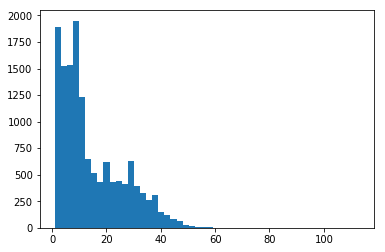

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist([len(s) for s in datax], bins=50)
plt.show()

In [62]:
print(max(len(x) for x in datax))
print(max(len(x) for x in datay))

113
113


In [63]:
maxLen=70
from keras.preprocessing.sequence import pad_sequences
padx=pad_sequences(datax, padding='post', maxlen=maxLen)
#뒤쪽에 모두 0으로 채움
pady=pad_sequences(datay, padding='post', maxlen=maxLen)

In [64]:
print(max(len(x) for x in padx))
print(max(len(x) for x in pady))
print(min(len(x) for x in padx))
print(min(len(x) for x in pady))

70
70
70
70


In [65]:
padx[0]
pady[0]

array([2, 3, 4, 3, 3, 3, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(padx, pady, test_size=0.2, random_state=42)

In [67]:
len(xtrain) #11232
len(xtest) #2809

2809

In [68]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam

In [69]:
nwords=len(word_to_index) #3382 단어 종류
nlabels=len(ner_to_index)  #10개 태깅 종류

In [70]:
model=Sequential()
model.add(Embedding(input_dim=nwords, output_dim=16, 
                    input_length=maxLen, mask_zero=True))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dense(nlabels, activation='softmax'))
#return_sequences=True : many to many
#return_sequences=False : many to one

W0829 14:38:21.070322  9008 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 14:38:21.085942  9008 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 14:38:21.085942  9008 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 14:38:21.278083  9008 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2974: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.wh

In [71]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

W0829 14:38:24.011590  9008 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 14:38:24.027224  9008 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [72]:
from keras.utils import np_utils
ytrain2=np_utils.to_categorical(ytrain)
ytrain2[0][0] #7

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [73]:
model.fit(xtrain, ytrain2, epochs=8)

W0829 14:38:28.058723  9008 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/8
11232/11232 [==============================] - 16s 1ms/step - loss: 0.8618 - acc: 0.8274
Epoch 2/8
11232/11232 [==============================] - 14s 1ms/step - loss: 0.4672 - acc: 0.8550
Epoch 3/8
11232/11232 [==============================] - 14s 1ms/step - loss: 0.3668 - acc: 0.8878
Epoch 4/8
11232/11232 [==============================] - 14s 1ms/step - loss: 0.2892 - acc: 0.9134
Epoch 5/8
11232/11232 [==============================] - 14s 1ms/step - loss: 0.2238 - acc: 0.9344
Epoch 6/8
11232/11232 [==============================] - 14s 1ms/step - loss: 0.1854 - acc: 0.9453
Epoch 7/8
11232/11232 [==============================] - 14s 1ms/step - loss: 0.1599 - acc: 0.9525
Epoch 8/8
11232/11232 [==============================] - 14s 1ms/step - loss: 0.1416 - acc: 0.9581


In [83]:
ytest2=np_utils.to_categorical(ytest)

for key, value in word_to_index.items():
    index_to_word[value]=key
index_to_word

index_to_ner={}
for key, value in ner_to_index.items():
    index_to_ner[value]=key
index_to_ner


#xtest[10]

ypredicted=model.predict(np.array([xtest[1]]))
ypredicted=np.argmax(ypredicted, axis=-1)

print("{:20} | {:5} | {}".format("단어", "실제값","예측값"))
print(40*"-")
true=np.argmax(ytest2[1],-1)
for w, t, pred in zip(xtest[1], true, ypredicted[0]):
    if w!=0: #PAD 제외
        print("{:22} | {:7} | {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))


단어                   | 실제값   | 예측값
----------------------------------------
ties                   | O       | O
between                | O       | O
the                    | O       | O
two                    | O       | O
neighbours             | O       | O
,                      | O       | O
OOV                    | O       | O
also                   | O       | O
over                   | O       | O
a                      | O       | O
military               | O       | O
accord                 | O       | O
between                | O       | O
turkey                 | B-LOC   | B-LOC
and                    | O       | O
israel                 | B-LOC   | B-LOC
which                  | O       | O
drew                   | O       | O
strong                 | O       | O
iranian                | B-MISC  | B-MISC
OOV                    | O       | O
,                      | O       | O
have                   | O       | O
improved               | O       | O
since                  

In [86]:
import pandas as pd
df=pd.DataFrame(columns=['x','y'])

In [87]:
df.loc[0] = [3,1]
df.loc[1] = [4,1]
df.loc[2] = [3,2]
df.loc[3] = [4,2]
df.loc[4] = [10,5]
df.loc[5] = [10,6]
df.loc[6] = [11,5]
df.loc[7] = [11,6]
df.loc[8] = [15,1]
df.loc[9] = [15,2]
df.loc[10] = [16,1]
df.loc[11] = [16,2]

In [88]:
df

,x,y
0,3,1
1,4,1
2,3,2
3,4,2
4,10,5
5,10,6
6,11,5
7,11,6
8,15,1
9,15,2


In [94]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

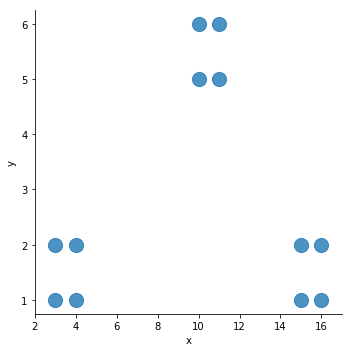

In [98]:
sns.lmplot('x','y',data=df,fit_reg=False, scatter_kws={"s":200})

In [100]:
data_points=df.values
kmeans=KMeans(n_clusters=3).fit(data_points)
kmeans.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1])

In [101]:
kmeans.cluster_centers_

array([[10.5,  5.5],
       [15.5,  1.5],
       [ 3.5,  1.5]])

In [102]:
df['cluster_id']=kmeans.labels_

In [103]:
df

,x,y,cluster_id
0,3,1,2
1,4,1,2
2,3,2,2
3,4,2,2
4,10,5,0
5,10,6,0
6,11,5,0
7,11,6,0
8,15,1,1
9,15,2,1


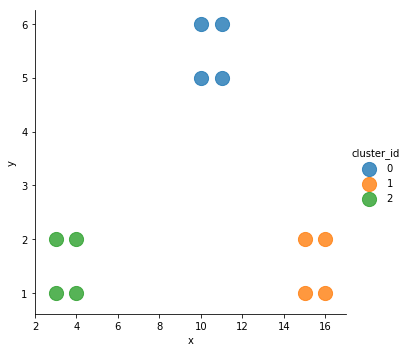

In [104]:
sns.lmplot('x','y',data=df,fit_reg=False, 
           scatter_kws={"s":200}, hue="cluster_id")

In [105]:
#rnn text 생성

In [106]:
from konlpy.corpus import kolaw

In [107]:
c=kolaw.open('constitution.txt').read()

In [115]:
len(sent_tokenize(c))
sentents=[s for s in sent_tokenize(c)]
sentents[3]

'제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.'

In [138]:
doc0=[" ".join(["".join(w) for w, t in okt.pos(s) 
                if w not in ["제","조"] and
                t not in ['Number','Foreign']]) 
      for s in sent_tokenize(c)]
doc0[3]
#대한민국의 국민이 되는 요건은 법률로 정한다
# for s in sent_tokenize(c):
#     for w, t in okt.pos(s):
#         if t not in ['Number', 'Foreign'] and w not in ['제','조']:
#             print(w)
 

'대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 .'

In [140]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(doc0)

In [146]:
doc=[l for l in tokenizer.texts_to_sequences(doc0) 
     if len(l)>1]
len(doc)
len(doc0)
doc[3]
#대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 

[102, 1, 22, 5, 111, 653, 4, 9, 24, 13, 6]

In [153]:
maxlen=max([len(x)-1 for x in doc]) #전체 문장 중에서 가장 많은 단어의 수
vocab_size=len(tokenizer.word_index)+1 #전체 단어 수
#print(maxlen)
    #print(len(x))
print(maxlen, vocab_size)

187 1165


In [154]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
#word2vec 모델 생성
#api 문서 참조
#most_similar("kid"), most_similar("man")...
#유사도 높은 단어 출력
#most_similar_cosmul("kid"), "man"
#similarity("boy","girl") #actor/actress...
# 감성분석